In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기 (파일 경로 수정 필요)
bus_df = pd.read_csv('13_bus_up2.csv')
# 새로운 시퀀스 번호를 생성하기 위해 누적 카운트를 사용하여 그룹화
bus_df['sequence_id'] = (bus_df['MASK_SELECTED'] == 1).cumsum() - 1  # 1일 때마다 시퀀스 ID 증가

# 시퀀스 개수 확인
num_sequences = bus_df['sequence_id'].nunique()

print(f"총 시퀀스 개수: {num_sequences}")

# travel_time이 360 이상인 시퀀스를 제거
filtered_bus_df = bus_df.groupby('sequence_id').filter(lambda x: x['travel_time'].max() <= 360)

# 조건을 만족하는 시퀀스 개수 확인
filtered_num_sequences = filtered_bus_df['sequence_id'].nunique()
print(f"조건을 만족하는 시퀀스 개수: {filtered_num_sequences}")
bus_df = filtered_bus_df

총 시퀀스 개수: 6167
조건을 만족하는 시퀀스 개수: 4414


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 함수 정의: 각 그룹에서 아웃라이어를 찾고 플래그 지정
def flag_outliers(group):
    Q1 = group['travel_time'].quantile(0.25)
    Q3 = group['travel_time'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    group['outlier'] = (group['travel_time'] < lower_bound) | (group['travel_time'] > upper_bound)
    return group

# CSV 파일 읽기 (파일 경로 수정 필요)
#bus_df = pd.read_csv('13_bus_up2.csv')
# MASK_SELECTED 기준으로 그룹화하여 아웃라이어 플래그 지정
df = bus_df.groupby('MASK_SELECTED', group_keys=False).apply(flag_outliers)

# 200초 이상인 아웃라이어를 포함한 시퀀스 제거
sequences_with_outliers = df[df['outlier'] & (df['travel_time'] > 100)]['sequence_id'].unique()
df = df[~df['sequence_id'].isin(sequences_with_outliers)]

# 560초 이상 값이 포함된 시퀀스 제거
sequences_with_high_travel_time = df[df['travel_time'] > 420]['sequence_id'].unique()
df = df[~df['sequence_id'].isin(sequences_with_high_travel_time)]

# 조건을 만족하는 시퀀스 개수 출력
filtered_num_sequences = df['sequence_id'].nunique()
print(f"조건을 만족하는 시퀀스 개수: {filtered_num_sequences}")

조건을 만족하는 시퀀스 개수: 2907


/tmp/ipykernel_365300/2808859777.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = bus_df.groupby('MASK_SELECTED', group_keys=False).apply(flag_outliers)


In [129]:
import pandas as pd

# 데이터 로드
#bus_df = pd.read_csv('13_bus_up2.csv')

# travel_time 열을 기준으로 내림차순 정렬
sorted_bus_df = bus_df.sort_values(by='travel_time', ascending=False)

# 상위 10개 값 확인
print(sorted_bus_df.head(10))

# 정렬된 데이터프레임 저장 (옵션)
sorted_bus_df.to_csv('sorted_bus_df.csv', index=False)


        MASK_SELECTED        LAT         LNG    STOP_ID          Parsed_Date  \
152393             18  36.796813  127.132140  285001518  2020-07-20 11:56:52   
166018              7  36.819015  127.156557  285000686  2020-08-09 09:48:37   
163302              7  36.819015  127.156557  285000686  2020-08-01 21:21:06   
75039              28  36.793545  127.103869  285071625  2020-02-21 07:36:45   
20361               6  36.819940  127.159774  285000707  2020-09-04 18:50:18   
149919              8  36.817329  127.152839  285000683  2020-07-15 12:15:11   
45919              28  36.793545  127.103869  285071625  2020-11-07 19:27:59   
112437             18  36.796813  127.132140  285001518  2020-05-08 15:38:25   
95262               7  36.819015  127.156557  285000686  2020-03-30 18:42:20   
169959             28  36.793545  127.103869  285071625  2020-08-21 13:31:03   

        up_down  temperature  Relative_Humidity  is_weekend   day_name  \
152393        0         25.4               78

In [130]:
# 데이터 로드
bus_df = pd.read_csv('sorted_bus_df.csv')

In [131]:
# 정류장 28의 데이터 확인
stop_28_data = bus_df[bus_df['MASK_SELECTED'] == 28]
print(stop_28_data['travel_time'].describe())
print(stop_28_data)


count    4414.000000
mean      184.509515
std       116.280153
min        37.000000
25%        63.000000
50%       167.500000
75%       304.000000
max       359.000000
Name: travel_time, dtype: float64
        MASK_SELECTED        LAT         LNG    STOP_ID          Parsed_Date  \
3                  28  36.793545  127.103869  285071625  2020-02-21 07:36:45   
6                  28  36.793545  127.103869  285071625  2020-11-07 19:27:59   
9                  28  36.793545  127.103869  285071625  2020-08-21 13:31:03   
16                 28  36.793545  127.103869  285071625  2020-02-20 14:08:51   
17                 28  36.793545  127.103869  285071625  2020-09-14 17:54:59   
...               ...        ...         ...        ...                  ...   
104770             28  36.793545  127.103869  285071625  2020-04-27 18:35:16   
105048             28  36.793545  127.103869  285071625  2020-08-28 10:50:44   
105085             28  36.793545  127.103869  285071625  2020-06-07 09:46:42  

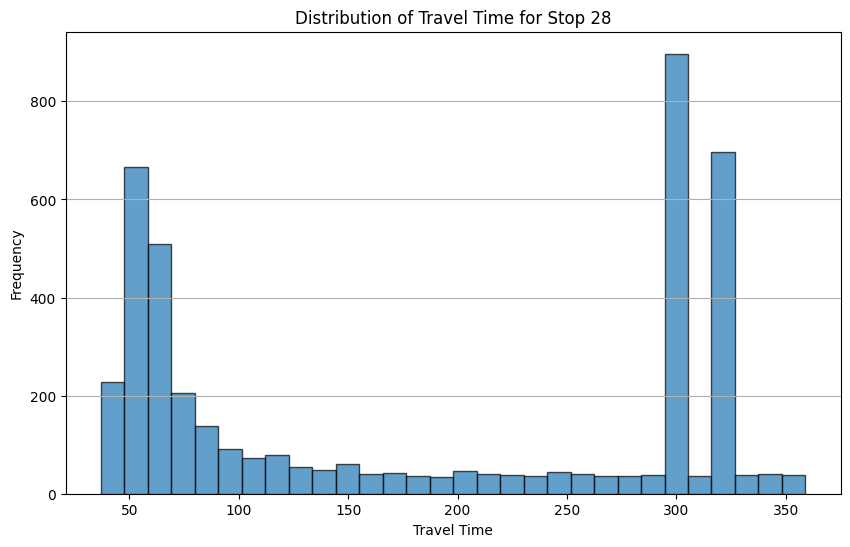

In [133]:
import matplotlib.pyplot as plt

# 히스토그램 생성
stop_28_data = bus_df[bus_df['MASK_SELECTED'] == 28]
plt.figure(figsize=(10, 6))
plt.hist(stop_28_data['travel_time'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Travel Time for Stop 28")
plt.xlabel("Travel Time")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [134]:
# 50 근처 데이터
group_50 = stop_28_data[stop_28_data['travel_time'] < 100]

# 300 근처 데이터
group_300 = stop_28_data[stop_28_data['travel_time'] >= 250]

# 각 그룹 통계
print("50 근처 데이터 통계:\n", group_50['travel_time'].describe())
print("300 근처 데이터 통계:\n", group_300['travel_time'].describe())


50 근처 데이터 통계:
 count    1823.000000
mean       61.424575
std        13.398301
min        37.000000
25%        51.000000
50%        59.000000
75%        68.000000
max        99.000000
Name: travel_time, dtype: float64
300 근처 데이터 통계:
 count    1911.000000
mean      308.975406
std        16.116393
min       250.000000
25%       304.000000
50%       304.000000
75%       318.000000
max       359.000000
Name: travel_time, dtype: float64


/tmp/ipykernel_365300/771139936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_28_data['hour'] = pd.to_datetime(stop_28_data['Parsed_Date']).dt.hour


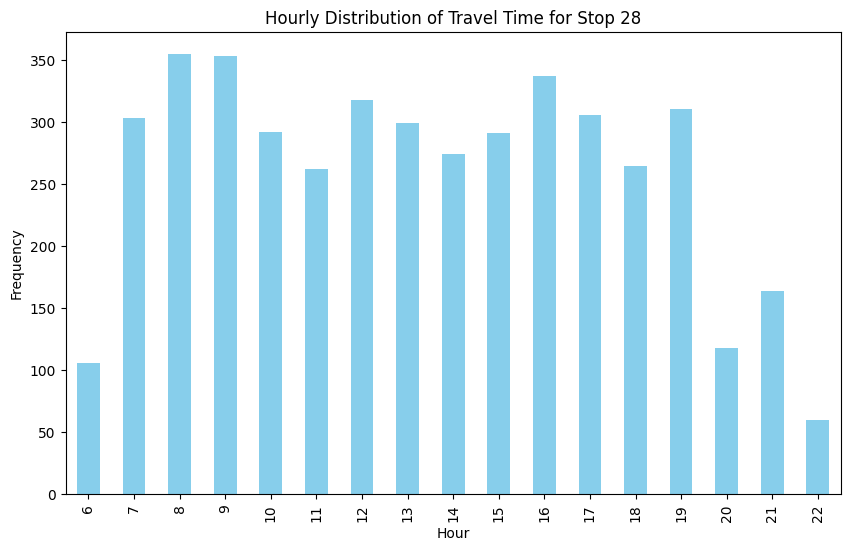

In [135]:
stop_28_data['hour'] = pd.to_datetime(stop_28_data['Parsed_Date']).dt.hour

# 시간대별 데이터 빈도
hourly_distribution = stop_28_data.groupby('hour')['travel_time'].count()

# 시각화
hourly_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Hourly Distribution of Travel Time for Stop 28")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

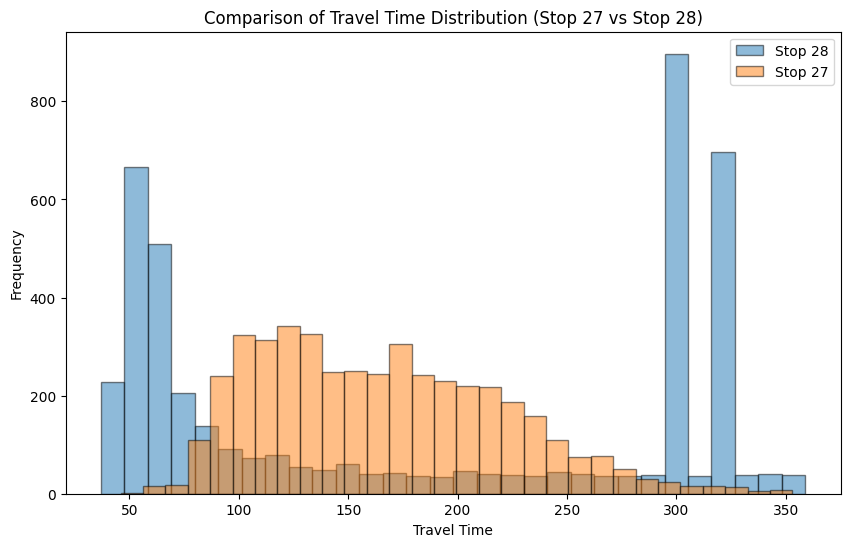

In [136]:
# 정류장 28과 다른 정류장의 데이터 분포 비교
stop_27_data = bus_df[bus_df['MASK_SELECTED'] == 27]  # 이전 정류장

# 히스토그램 비교
plt.figure(figsize=(10, 6))
plt.hist(stop_28_data['travel_time'], bins=30, alpha=0.5, label='Stop 28', edgecolor='k')
plt.hist(stop_27_data['travel_time'], bins=30, alpha=0.5, label='Stop 27', edgecolor='k')
plt.title("Comparison of Travel Time Distribution (Stop 27 vs Stop 28)")
plt.xlabel("Travel Time")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [124]:
import pandas as pd

# 정류장별 평균값과 분산 계산
# MASK_SELECTED 열에 따라 그룹화
bus_stop_stats = bus_df.groupby('MASK_SELECTED')['travel_time'].agg(['mean', 'var']).reset_index()

# 컬럼명 변경 (가독성을 위해)
bus_stop_stats.rename(columns={'mean': 'Average_Travel_Time', 'var': 'Variance_Travel_Time'}, inplace=True)

# 결과 출력
print(bus_stop_stats)

# 데이터프레임 저장 (필요 시)
bus_stop_stats.to_csv('bus_stop_stats.csv', index=False)

    MASK_SELECTED  Average_Travel_Time  Variance_Travel_Time
0               1             0.000000              0.000000
1               2            62.984594           2080.739396
2               3            87.001586           1418.032855
3               4            87.736747           1218.398844
4               5           107.324422           2114.356997
5               6            93.238333           2659.918258
6               7           107.123018           4690.653116
7               8           152.480063           5693.357296
8               9            62.960353           1167.749844
9              10            70.409606           1540.586774
10             11            60.804033           2193.247561
11             12            70.347531           2206.118488
12             13            49.935659            714.545146
13             14            66.306072            753.129730
14             15            94.254191           1661.599093
15             16       

In [139]:
import pandas as pd

# CSV 파일 경로
file_path = '13_bus_up2.csv'  # 파일 경로를 실제 경로로 바꾸세요.

# CSV 파일 읽기
bus_df = pd.read_csv(file_path)

# 데이터프레임 구조 확인
print(bus_df.info())  # 데이터의 열 정보, 데이터 타입, 결측치 여부 확인
print(bus_df.head())  # 상위 5개 데이터 확인

# travel_time 열의 기본 통계 확인
print(bus_df['travel_time'].describe())  # travel_time 열의 주요 통계 (평균, 최대, 최소 등)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172676 entries, 0 to 172675
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MASK_SELECTED      172676 non-null  int64  
 1   LAT                172676 non-null  float64
 2   LNG                172676 non-null  float64
 3   STOP_ID            172676 non-null  int64  
 4   Parsed_Date        172676 non-null  object 
 5   up_down            172676 non-null  int64  
 6   temperature        172676 non-null  float64
 7   Relative_Humidity  172676 non-null  float64
 8   is_weekend         172676 non-null  bool   
 9   day_name           172676 non-null  object 
 10  previous           172676 non-null  float64
 11  wind_d             172676 non-null  float64
 12  wind_s             172676 non-null  float64
 13  Bus_num            172676 non-null  int64  
 14  prev_arrive_time   172676 non-null  object 
 15  start_time         172676 non-null  object 
 16  se

In [140]:
# 360 이상의 값과 이하 값 비교
over_360 = bus_df[bus_df['travel_time'] >= 360]
under_360 = bus_df[bus_df['travel_time'] < 360]

# 주요 통계 비교
print("360 이상 데이터 통계:")
print(over_360.describe())

print("\n360 미만 데이터 통계:")
print(under_360.describe())


360 이상 데이터 통계:
       MASK_SELECTED          LAT          LNG       STOP_ID  up_down  \
count    1808.000000  1808.000000  1808.000000  1.808000e+03   1808.0   
mean       24.763827    36.797235   127.112054  2.851933e+08      0.0   
std         7.589720     0.009635     0.019567  6.129612e+05      0.0   
min         3.000000    36.784805   127.102880  2.850002e+08      0.0   
25%        28.000000    36.793545   127.103869  2.850716e+08      0.0   
50%        28.000000    36.793545   127.103869  2.850716e+08      0.0   
75%        28.000000    36.793545   127.103869  2.850716e+08      0.0   
max        28.000000    36.833080   127.173001  2.880022e+08      0.0   

       temperature  Relative_Humidity     previous       wind_d       wind_s  \
count  1808.000000        1808.000000  1808.000000  1808.000000  1808.000000   
mean     24.369469          78.626604   477.653208   104.077434     0.751106   
std       2.431214          10.495845   181.294572    57.064121     0.316681   
min    

/tmp/ipykernel_365300/4229035633.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([under_360['travel_time'], over_360['travel_time']], labels=['<360', '>=360'])


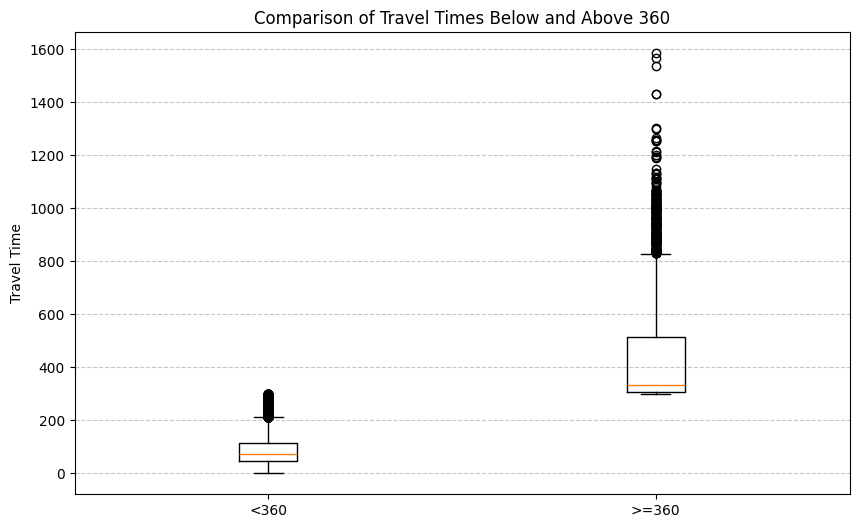

In [92]:
# 박스플롯으로 비교
plt.figure(figsize=(10, 6))
plt.boxplot([under_360['travel_time'], over_360['travel_time']], labels=['<360', '>=360'])
plt.title("Comparison of Travel Times Below and Above 360")
plt.ylabel("Travel Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


클러스터 중심: [[315.67024555]
 [ 78.20988581]]


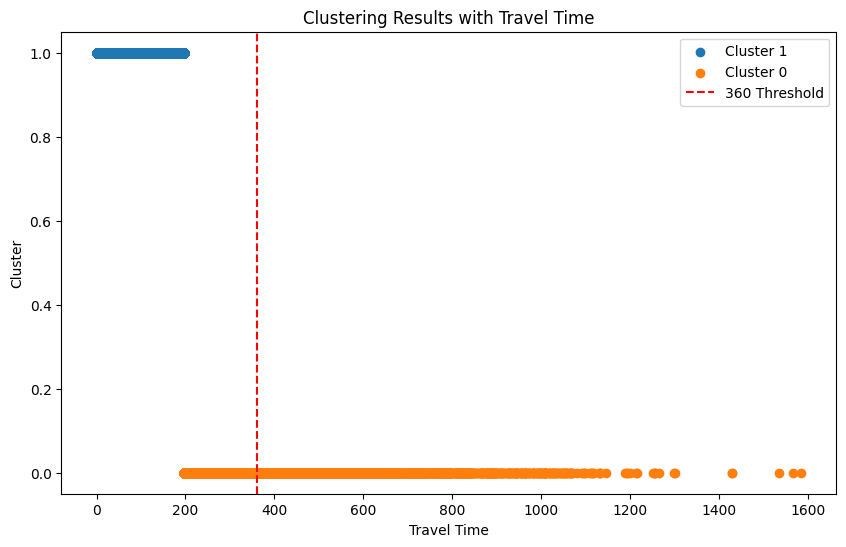

In [141]:
from sklearn.cluster import KMeans

# 데이터 클러스터링 (여기선 travel_time만 사용)
kmeans = KMeans(n_clusters=2, random_state=42)
bus_df['cluster'] = kmeans.fit_predict(bus_df[['travel_time']])

# 클러스터별 중심 확인
cluster_centers = kmeans.cluster_centers_
print("클러스터 중심:", cluster_centers)

# 클러스터 시각화
plt.figure(figsize=(10, 6))
for cluster in bus_df['cluster'].unique():
    cluster_data = bus_df[bus_df['cluster'] == cluster]
    plt.scatter(cluster_data['travel_time'], [cluster] * len(cluster_data), label=f"Cluster {cluster}")
plt.axvline(360, color='red', linestyle='--', label='360 Threshold')
plt.title("Clustering Results with Travel Time")
plt.xlabel("Travel Time")
plt.ylabel("Cluster")
plt.legend()
plt.show()


In [148]:
from sklearn.cluster import KMeans

# K-means로 군집화
kmeans = KMeans(n_clusters=2, random_state=42)
bus_df['cluster'] = kmeans.fit_predict(bus_df[['travel_time']])

# 각 클러스터의 중심 확인
print("Cluster Centers:", kmeans.cluster_centers_)


Cluster Centers: [[315.67024555]
 [ 78.20988581]]


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 데이터 로드 (파일 경로를 실제 파일 경로로 변경)
file_path = 'bus_df.csv'
bus_df = pd.read_csv(file_path)

# 360 이상 제거한 데이터
cleaned_data = bus_df[bus_df['travel_time'] < 360]

# 평균 및 분산 계산
original_mean = bus_df['travel_time'].mean()
original_variance = bus_df['travel_time'].var()
cleaned_mean = cleaned_data['travel_time'].mean()
cleaned_variance = cleaned_data['travel_time'].var()

# 왜도 및 첨도 계산
original_skewness = skew(bus_df['travel_time'])
original_kurtosis = kurtosis(bus_df['travel_time'])
cleaned_skewness = skew(cleaned_data['travel_time'])
cleaned_kurtosis = kurtosis(cleaned_data['travel_time'])

# 결과 출력
print(f"원본 데이터 평균: {original_mean}, 분산: {original_variance}")
print(f"360 이상 제거 후 평균: {cleaned_mean}, 분산: {cleaned_variance}")
print(f"원본 데이터 왜도: {original_skewness}, 첨도: {original_kurtosis}")
print(f"360 이상 제거 후 왜도: {cleaned_skewness}, 첨도: {cleaned_kurtosis}")



원본 데이터 평균: 92.042808496838, 분산: 6330.948206512764
360 이상 제거 후 평균: 78.45969182054162, 분산: 1910.0845043184859
원본 데이터 왜도: 4.385299858376045, 첨도: 35.79828774043538
360 이상 제거 후 왜도: 0.49436162203287126, 첨도: -0.3060143741155268


    MASK_SELECTED        mean           var  cluster
0               1    0.000000      0.000000        0
1               2   63.022701   2157.088359        0
2               3   86.212745   2298.011171        0
3               4   87.035025   1281.268640        0
4               5  112.118534   5359.317605        2
5               6   91.173504   2650.165805        0
6               7  110.280201   6263.504024        2
7               8  148.652019   5672.480576        2
8               9   61.992054   1127.271588        0
9              10   68.360467   1422.524762        0
10             11   61.270310   2217.758092        0
11             12   68.025782   2133.632323        0
12             13   49.102481    760.784501        0
13             14   65.806551    761.230330        0
14             15   91.873196   1576.735459        0
15             16  122.282958    424.556477        0
16             17   36.537863    134.658921        0
17             18  129.169612   2914.015340   

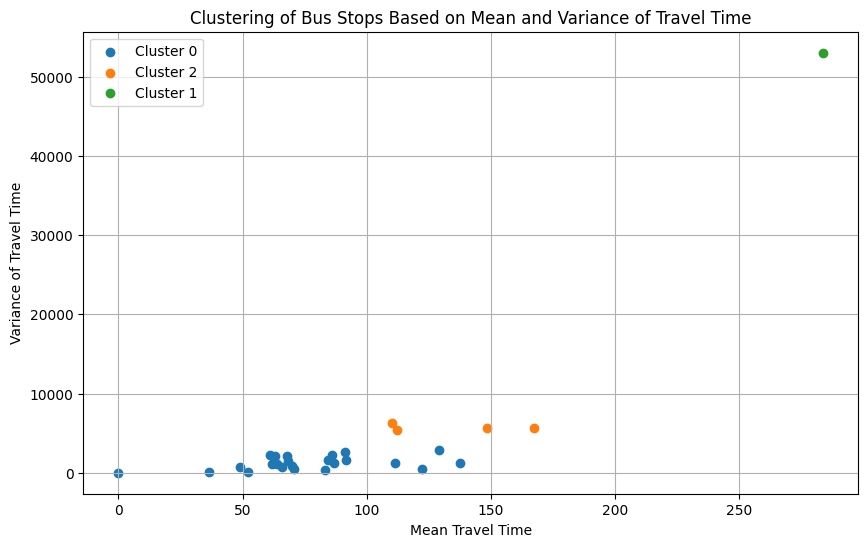

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 정류장별 평균 및 분산 데이터 계산
bus_stop_stats = bus_df.groupby('MASK_SELECTED')['travel_time'].agg(['mean', 'var']).reset_index()

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)  # 3개의 클러스터로 설정
bus_stop_stats['cluster'] = kmeans.fit_predict(bus_stop_stats[['mean', 'var']])

# 클러스터링 결과 출력
print(bus_stop_stats)

# 시각화: 평균 vs 분산
plt.figure(figsize=(10, 6))
for cluster_id in bus_stop_stats['cluster'].unique():
    cluster_data = bus_stop_stats[bus_stop_stats['cluster'] == cluster_id]
    plt.scatter(cluster_data['mean'], cluster_data['var'], label=f"Cluster {cluster_id}")

plt.title("Clustering of Bus Stops Based on Mean and Variance of Travel Time")
plt.xlabel("Mean Travel Time")
plt.ylabel("Variance of Travel Time")
plt.legend()
plt.grid()
plt.show()


In [144]:
# 360 이상 제거한 데이터
cleaned_data = bus_df[bus_df['travel_time'] < 480]

# 평균 및 분산 변화 확인
original_mean = bus_df['travel_time'].mean()
original_variance = bus_df['travel_time'].var()
cleaned_mean = cleaned_data['travel_time'].mean()
cleaned_variance = cleaned_data['travel_time'].var()

print(f"원본 데이터 평균: {original_mean}, 분산: {original_variance}")
print(f"360 이상 제거 후 평균: {cleaned_mean}, 분산: {cleaned_variance}")


원본 데이터 평균: 92.042808496838, 분산: 6330.948206512764
360 이상 제거 후 평균: 88.04798768828988, 분산: 3737.6727873789664


In [79]:
 #아웃라이어 정의: travel_time 열에서 특정 임계값 이상 값 찾기 (예: 360 이상)
outliers = bus_df[bus_df['travel_time'] >= 360]

# 아웃라이어 데이터 확인
print("Outlier Count:", len(outliers))
print(outliers.describe())  # 아웃라이어 데이터의 통계 정보 출력

Outlier Count: 2
       MASK_SELECTED        LAT         LNG       STOP_ID  up_down  \
count       2.000000   2.000000    2.000000  2.000000e+00      2.0   
mean       12.500000  36.807914  127.144349  2.850011e+08      0.0   
std         7.778175   0.015699    0.017266  5.883128e+02      0.0   
min         7.000000  36.796813  127.132140  2.850007e+08      0.0   
25%         9.750000  36.802363  127.138244  2.850009e+08      0.0   
50%        12.500000  36.807914  127.144349  2.850011e+08      0.0   
75%        15.250000  36.813464  127.150453  2.850013e+08      0.0   
max        18.000000  36.819015  127.156557  2.850015e+08      0.0   

       temperature  Relative_Humidity    previous  wind_d  wind_s  \
count          2.0                2.0    2.000000     2.0     2.0   
mean          25.4               78.1  531.500000    93.0     0.8   
std            0.0                0.0  290.620887     0.0     0.0   
min           25.4               78.1  326.000000    93.0     0.8   
25%    

/tmp/ipykernel_365300/477945051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['hour'] = pd.to_datetime(outliers['Parsed_Date']).dt.hour


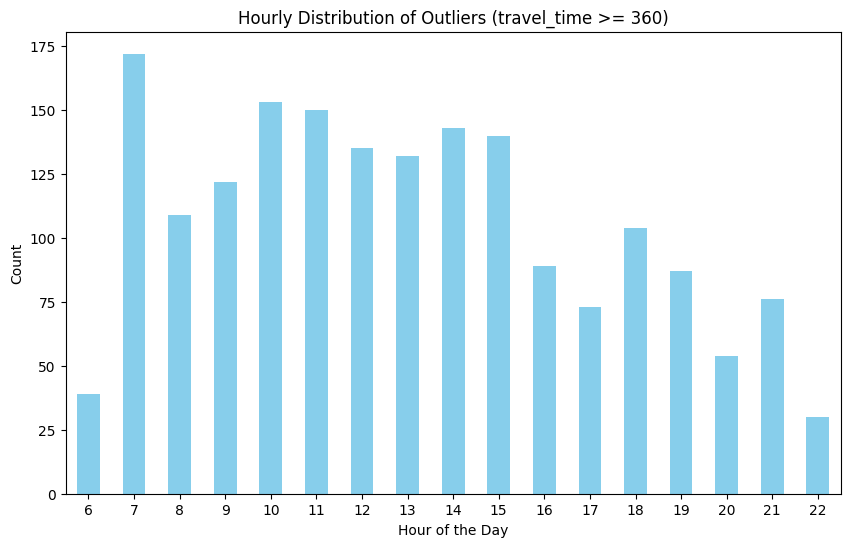

In [69]:
# 360 이상의 데이터 시간대 분포
outliers['hour'] = pd.to_datetime(outliers['Parsed_Date']).dt.hour
hourly_distribution = outliers['hour'].value_counts().sort_index()

# 시각화
hourly_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Hourly Distribution of Outliers (travel_time >= 360)")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


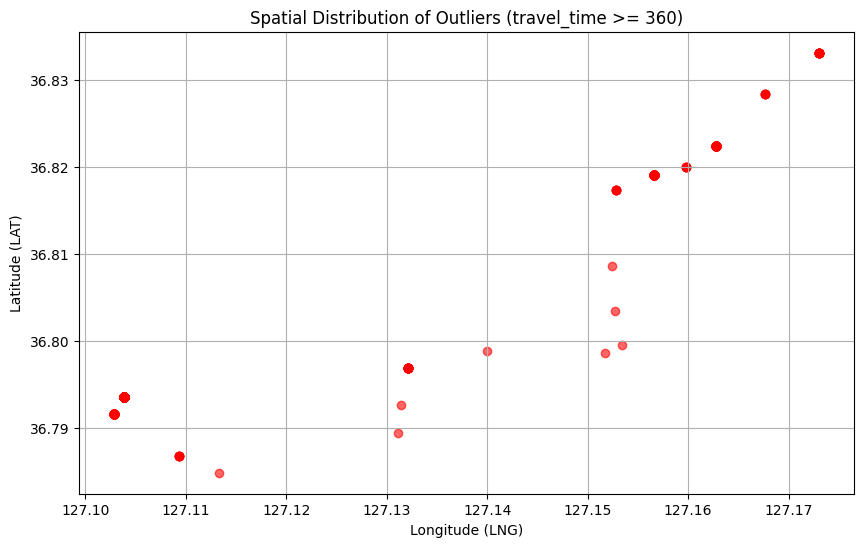

In [70]:
import matplotlib.pyplot as plt

# 위도(LAT)와 경도(LNG) 산점도
plt.figure(figsize=(10, 6))
plt.scatter(outliers['LNG'], outliers['LAT'], alpha=0.6, c='red')
plt.title("Spatial Distribution of Outliers (travel_time >= 360)")
plt.xlabel("Longitude (LNG)")
plt.ylabel("Latitude (LAT)")
plt.grid()
plt.show()


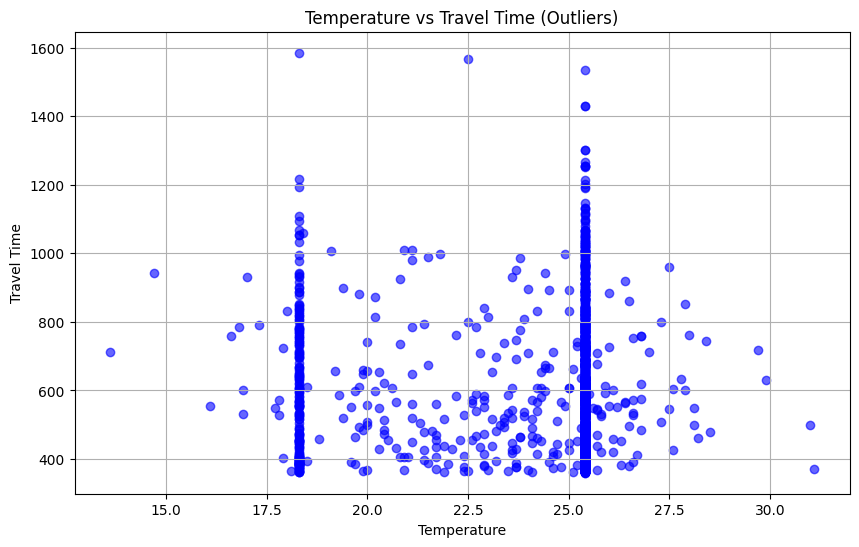

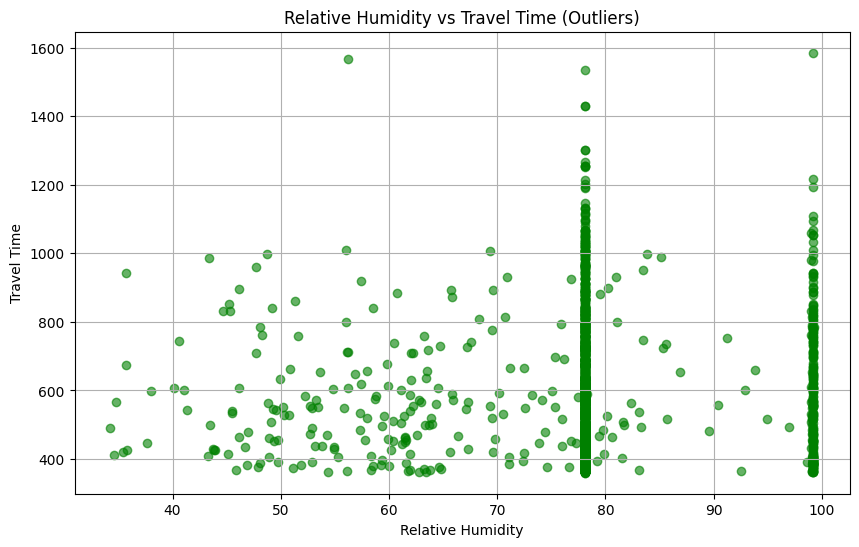

In [71]:
# 온도와 운행 시간 관계
plt.figure(figsize=(10, 6))
plt.scatter(outliers['temperature'], outliers['travel_time'], alpha=0.6, c='blue')
plt.title("Temperature vs Travel Time (Outliers)")
plt.xlabel("Temperature")
plt.ylabel("Travel Time")
plt.grid()
plt.show()

# 습도와 운행 시간 관계
plt.figure(figsize=(10, 6))
plt.scatter(outliers['Relative_Humidity'], outliers['travel_time'], alpha=0.6, c='green')
plt.title("Relative Humidity vs Travel Time (Outliers)")
plt.xlabel("Relative Humidity")
plt.ylabel("Travel Time")
plt.grid()
plt.show()


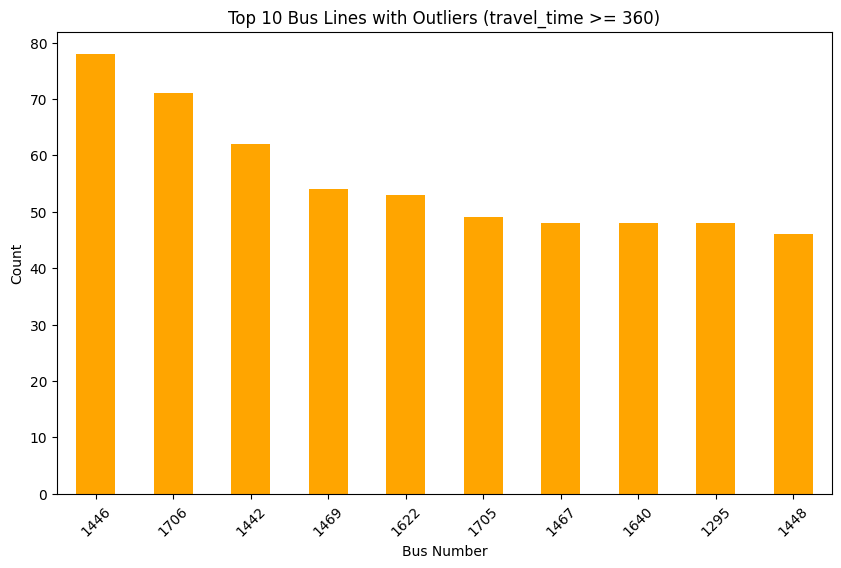

In [72]:
# 노선별 아웃라이어 분포
bus_distribution = outliers['Bus_num'].value_counts()

# 상위 10개 노선 시각화
bus_distribution.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Top 10 Bus Lines with Outliers (travel_time >= 360)")
plt.xlabel("Bus Number")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
